In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
df = pd.read_csv("covtype.csv")

In [ ]:
df.head()

In [4]:
df.shape

(581012, 55)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
sns.countplot(x="Cover_Type", data=df)

In [ ]:
sns.boxplot(x="Cover_Type", y="Elevation", data=df)

In [9]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = rf_model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.9557068234038708

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.95      0.96     42550
           2       0.95      0.97      0.96     56519
           3       0.94      0.96      0.95      7083
           4       0.92      0.85      0.88       558
           5       0.94      0.77      0.85      1889
           6       0.94      0.90      0.92      3472
           7       0.98      0.95      0.96      4132

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



In [16]:
cm = confusion_matrix(y_test, y_pred)

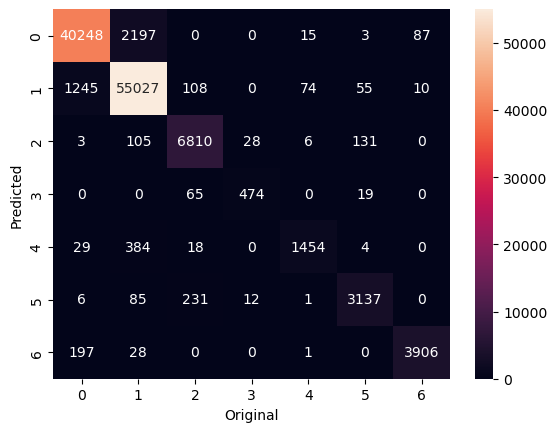

In [17]:
plt.figure()
sns.heatmap(cm, annot=True, fmt=".0f")
plt.ylabel("Predicted")
plt.xlabel("Original")
plt.show()

In [18]:
pickle.dump(rf_model, open("rf.pkl", "wb"))